In [3]:
import numpy as np
import matplotlib.pyplot as plt

#animate with vpython
from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

<IPython.core.display.Javascript object>

In [4]:
#GOAL: Create a line with 4 springs, two balls, one w left wall, one w right

#properties of the system
M = 12 #mass of string in kg
L = 10 #length of string in m
K = 1 #effective stiffness in N/m
N = 3 #number of masses

#properties of each mass
m = M/N
L0 = L/N
k = K*N

#initial conditions
ui = np.zeros(N) #initial displacement
ui[0] = 1 #displace first mass

#Build matrices
A=np.zeros((N,N))

for i in range(N):
    A[i,i] = 2*k #the diagonal
    if i==0: #first row
        A[0,i+1]=-k 
        A[i,i] = k #free end
    elif i==N-1: #last row
        A[i,i-1]=-k 
        A[i,i] = k #free end
    else:
        A[i,i-1]=-2*k #Add here for left -2k
        A[i,i+1]=-k   #Add here for right -2k

B=m*np.identity(N)

#find eigenvalues and eigenvectors
lamb, a = eigh(A, B)  # eigenvalues and eigenvectors
omegas = np.sqrt(lamb)

print("\n frequencies (omega):", omegas)
print("\n eigenvectors are column vectors in:\n\n", a)


 frequencies (omega): [       nan 0.8660254  1.68625795]

 eigenvectors are column vectors in:

 [[-3.49029782e-01 -2.23606798e-01  2.79603668e-01]
 [-3.12606404e-01 -1.02809925e-17 -3.90227160e-01]
 [-1.74514891e-01  4.47213595e-01  1.39801834e-01]]


/var/folders/tr/835jh49j3bg3ld_f_wmjxvd80000gn/T/ipykernel_64761/2437490562.py:37: RuntimeWarning: invalid value encountered in sqrt
  omegas = np.sqrt(lamb)


In [5]:
def plotmode(mode):
    modeindex = mode-1
    h = 0.01
    ttotal = 20 #total time for calculations

    # array of times
    t = np.arange(0,ttotal,h)

    # build data array with all data; u[:,0] is time; other columns are u_i for each atom i
    u = np.zeros((int(ttotal/h), N+1))

    u[:,0] = np.transpose(t) #t.T

    for i in range(N):
        u_atom = a[i,modeindex]*np.cos(omegas[modeindex]*t)
        u[:,i+1] = np.transpose(u_atom)[:]

    # plot
    plt.figure(figsize=(12,8))
    plt.title("displacement of each atom")
    plt.xlabel("t (s)")
    plt.ylabel("$u_i$ (m)")
    for i in range(N): #plot each atom
        plt.plot(u[:,0], u[:,i+1], label="atom {:d}".format(i+1))
    plt.grid()
    plt.legend()
    plt.show()
    
    return u

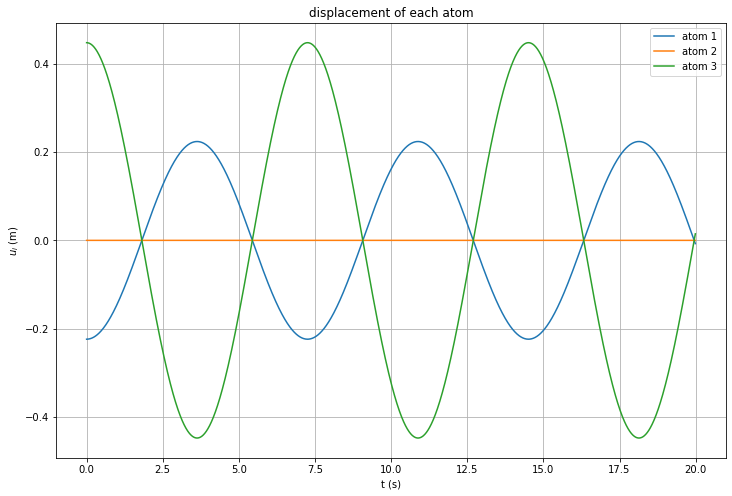

In [6]:
u = plotmode(2)

In [9]:
def animate(u):
    ####################################
    scene=canvas()
    
    scene.background=color.white
    scene.fov = 0.1
    
    thick = L0/20
    height=L0/2
    R=L0/10
    R2=R/4
    
    balls=[]
    xballs = np.linspace(-L/2,L/2,N)
    
    springs=[]
    
    Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, L), color=color.white)
    spring = helix(pos=Lwall.pos, axis=vec(L0,0,0), color=color.orange, radius=R)
    springs.append(spring)
    
    ball = sphere(pos=spring.pos+vector(L/4,R-R2,0), radius=R, color=color.green)
    balls.append(ball)
    
    i = 0
    
    for x in xballs:
        ball = sphere(pos=spring.pos, radius=L0/10, color=color.red)
        ball.eq = x
        balls.append(ball)
        if i < N: #Spring to right of last mass
            spring = helix(pos=ball.pos, axis=vec(L0,0,0), color=color.orange, radius=ball.radius/2)
            springs.append(spring)
        i = i + 1
    
    #set initial positions
    for i in range(0,len(balls)):
        ball = balls[i]
        ball.pos.x = ball.eq + u[0,i+1]
    for i in range(0, len(springs)):
        spring = springs[i]
        spring.pos=balls[i].pos
        spring.axis=balls[i].pos-spring.pos
    
    #animate
    scene.pause()
    t=0
    for n in range(len(u[:,0])):
        rate(300)
        for i in range(len(balls)):
            ball = balls[i]
            ball.pos.x = ball.eq + u[n,i+1]
        for i in range(len(springs)):
            spring = springs[i]
            spring.pos = balls[i].pos
            spring.axis = balls[i+1].pos-spring.pos 
        

In [10]:
animate(u)

<IPython.core.display.Javascript object>

AttributeError: 'sphere' object has no attribute 'eq'